<a href="https://colab.research.google.com/github/anabeatrizzdm/WineStatistics/blob/main/wineStatistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [29]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [30]:
vinhos = pd.read_csv('/content/drive/MyDrive/winedataset.csv')

In [31]:
vinhos.head()

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### Limpeza do dataset

In [32]:
vinhos_cleaned = vinhos.drop(columns=['description','designation', 'taster_name', 'taster_twitter_handle'])
vinhos_cleaned.head()

,id,country,points,price,province,region_1,region_2,title,variety,winery
0,0,Italy,87,NaN,Sicily & Sardinia,Etna,NaN,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [33]:
vinhos.shape

(129971, 14)

### Média, mediana e desvio padrão das pontuações dos vinhos

In [34]:
media_pontuacoes = vinhos_cleaned['points'].mean()
mediana_pontuacoes = vinhos_cleaned['points'].median()
desvio_padrao_pontuacoes = vinhos_cleaned['points'].std()

In [35]:
print(f"Média das pontuações: {media_pontuacoes}")
print(f"Mediana das pontuações: {mediana_pontuacoes}")
print(f"Desvio padrão das pontuações: {desvio_padrao_pontuacoes}")

Média das pontuações: 88.44713820775404
Mediana das pontuações: 88.0
Desvio padrão das pontuações: 3.039730202916003


### Comparação das pontuações entre diferentes países

In [36]:
pontuacoes_pais = vinhos_cleaned.groupby('country')['points'].agg(['mean', 'median', 'std'])
print("Pontuações por país:")
pontuacoes_pais.head()

Pontuações por país:


,mean,median,std
country,,,
Argentina,86.710263,87.0,3.179627
Armenia,87.500000,87.5,0.707107
Australia,88.580507,89.0,2.989900
Austria,90.101345,90.0,2.499799
Bosnia and Herzegovina,86.500000,86.5,2.121320


### Comparação de pontuações entre diferentes variedades de uva

In [63]:
pontuacoes_variedade = vinhos_cleaned.groupby('variety')['points'].agg(['mean', 'median', 'std'])
print("Pontuações por variedade de uva:")
pontuacoes_variedade.head()

Pontuações por variedade de uva:


,mean,median,std
variety,,,
Abouriou,87.666667,87.0,3.055050
Agiorgitiko,87.031746,87.0,1.991662
Aglianico,89.275766,89.0,2.598721
Aidani,82.000000,82.0,NaN
Airen,81.666667,82.0,1.527525


In [38]:
pontuacoes_vinicola = vinhos_cleaned.groupby('winery')['points'].agg(['mean', 'median', 'std'])
print("Pontuações por vinícola:")
pontuacoes_vinicola.head()

Pontuações por vinícola:


,mean,median,std
winery,,,
1+1=3,86.666667,87.0,2.581989
10 Knots,83.250000,83.5,1.707825
100 Percent Wine,86.333333,86.0,2.516611
1000 Stories,90.500000,90.5,0.707107
1070 Green,88.000000,88.0,NaN


### Correlação entre duas variaveis

In [39]:
correlacao = vinhos_cleaned['price'].corr(vinhos_cleaned['points'])
print(f"Correlação entre preço e pontuação: {correlacao}")

Correlação entre preço e pontuação: 0.41616674186062225


Text(0, 0.5, 'Price')

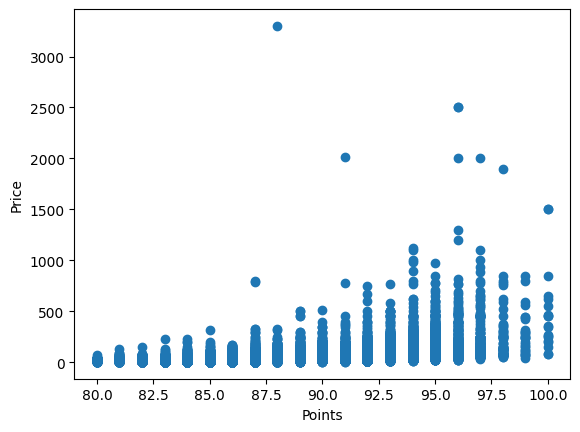

In [40]:
fig = plt.figure()
plt.scatter(vinhos_cleaned['points'], vinhos_cleaned['price'])
plt.xlabel('Points')
plt.ylabel('Price')

### Estatísticas descritivas dos preços

In [41]:
media_precos = vinhos_cleaned['price'].mean()
mediana_precos = vinhos_cleaned['price'].median()
desvio_padrao_precos = vinhos_cleaned['price'].std()

In [42]:
print(f"Média dos preços: {media_precos}")
print(f"Mediana dos preços: {mediana_precos}")
print(f"Desvio padrão dos preços: {desvio_padrao_precos}")

Média dos preços: 35.363389129985535
Mediana dos preços: 25.0
Desvio padrão dos preços: 41.02221766808723


### Histograma da distribuição dos preços

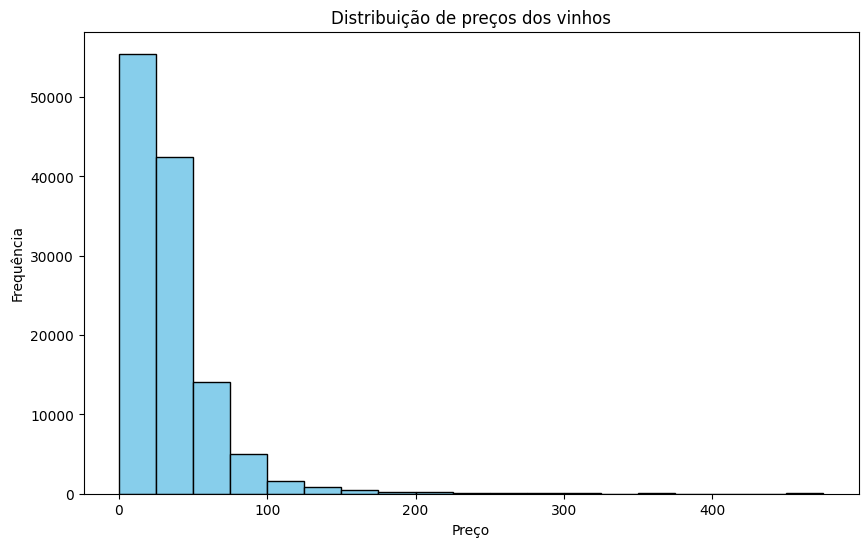

In [43]:
plt.figure(figsize=(10,6))
plt.hist(vinhos_cleaned['price'], bins=range(0, 500, 25), color='skyblue', edgecolor='black')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.title('Distribuição de preços dos vinhos')
plt.show()

### Frequência de vinhos de cada país

In [44]:
frequencia_paises = vinhos_cleaned['country'].value_counts()

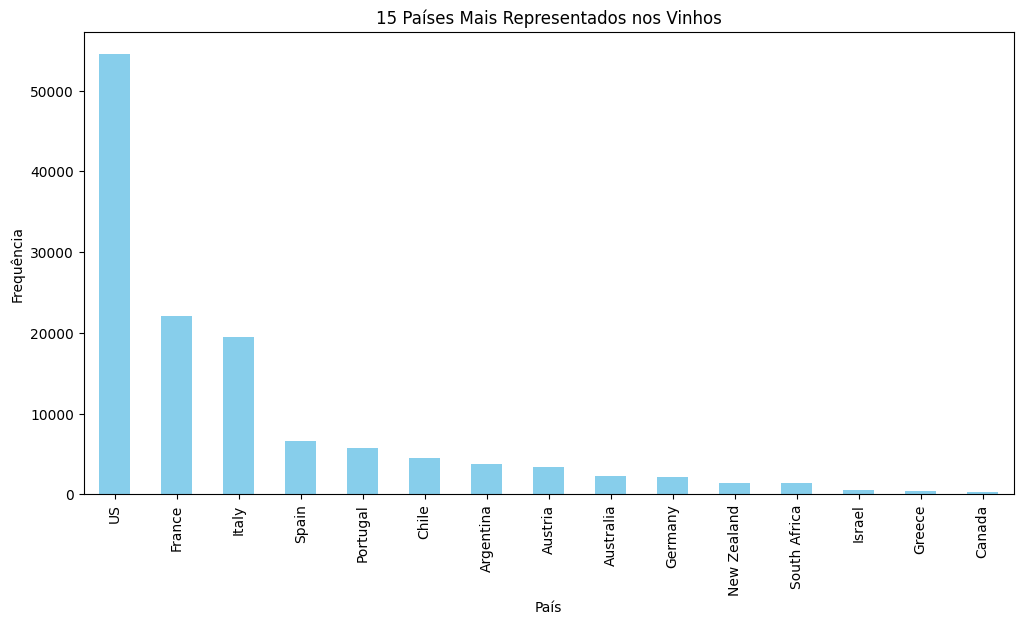

In [45]:
top_paises = frequencia_paises.head(15)
plt.figure(figsize=(12, 6))
top_paises.plot(kind='bar', color='skyblue')
plt.xlabel('País')
plt.ylabel('Frequência')
plt.title('15 Países Mais Representados nos Vinhos')
plt.show()

### Boxplot do pontos dos vinhos

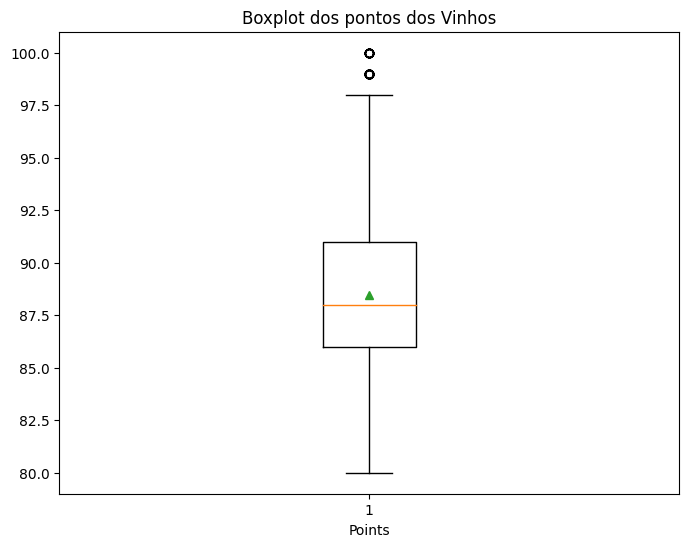

In [46]:
plt.figure(figsize=(8, 6))
plt.boxplot(vinhos_cleaned['points'], showmeans = True, vert=True)
plt.xlabel('Points')
plt.title('Boxplot dos pontos dos Vinhos')
plt.show()

### Variedades de uva

In [47]:
contagem_variedades = vinhos_cleaned['variety'].value_counts()

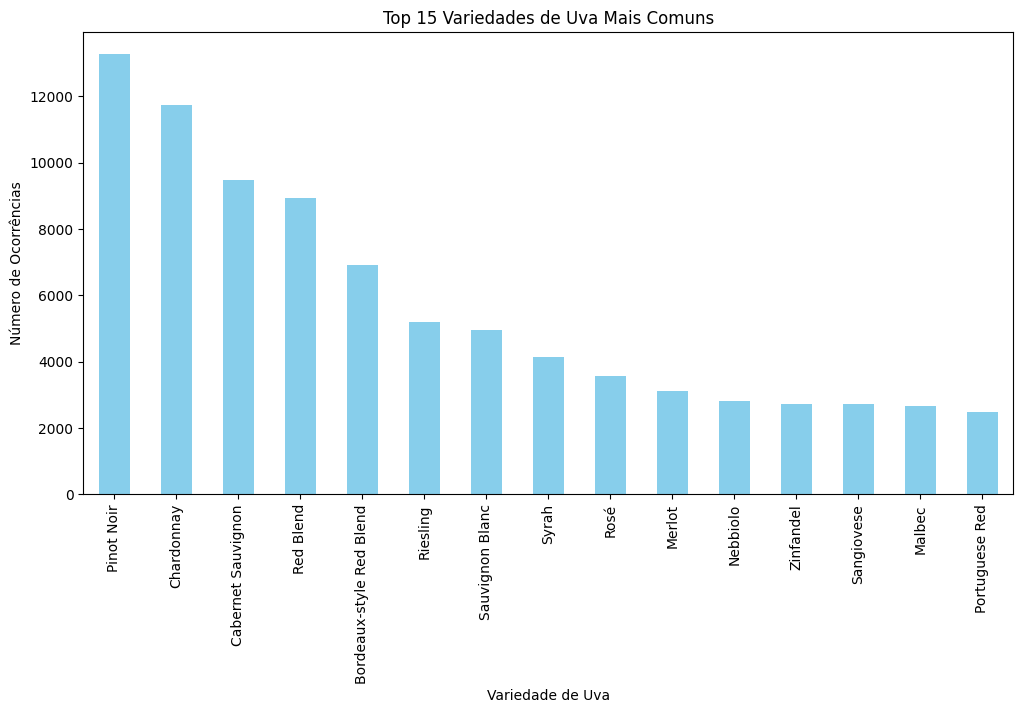

In [48]:
top_variedades = contagem_variedades.head(15)
plt.figure(figsize=(12, 6))
top_variedades.plot(kind='bar', color='skyblue')
plt.xlabel('Variedade de Uva')
plt.ylabel('Número de Ocorrências')
plt.title('Top 15 Variedades de Uva Mais Comuns')
plt.show()

### Variedade de uva por país

In [70]:
top_paises = vinhos_cleaned['country'].value_counts().head(3).index
top_paises

Index(['US', 'France', 'Italy'], dtype='object')

In [90]:
top_variedades = vinhos_cleaned['variety'].value_counts().head(10).index
vinhos_top = vinhos_cleaned[(vinhos_cleaned['country'].isin(top_paises)) & (vinhos_cleaned['variety'].isin(top_variedades))]

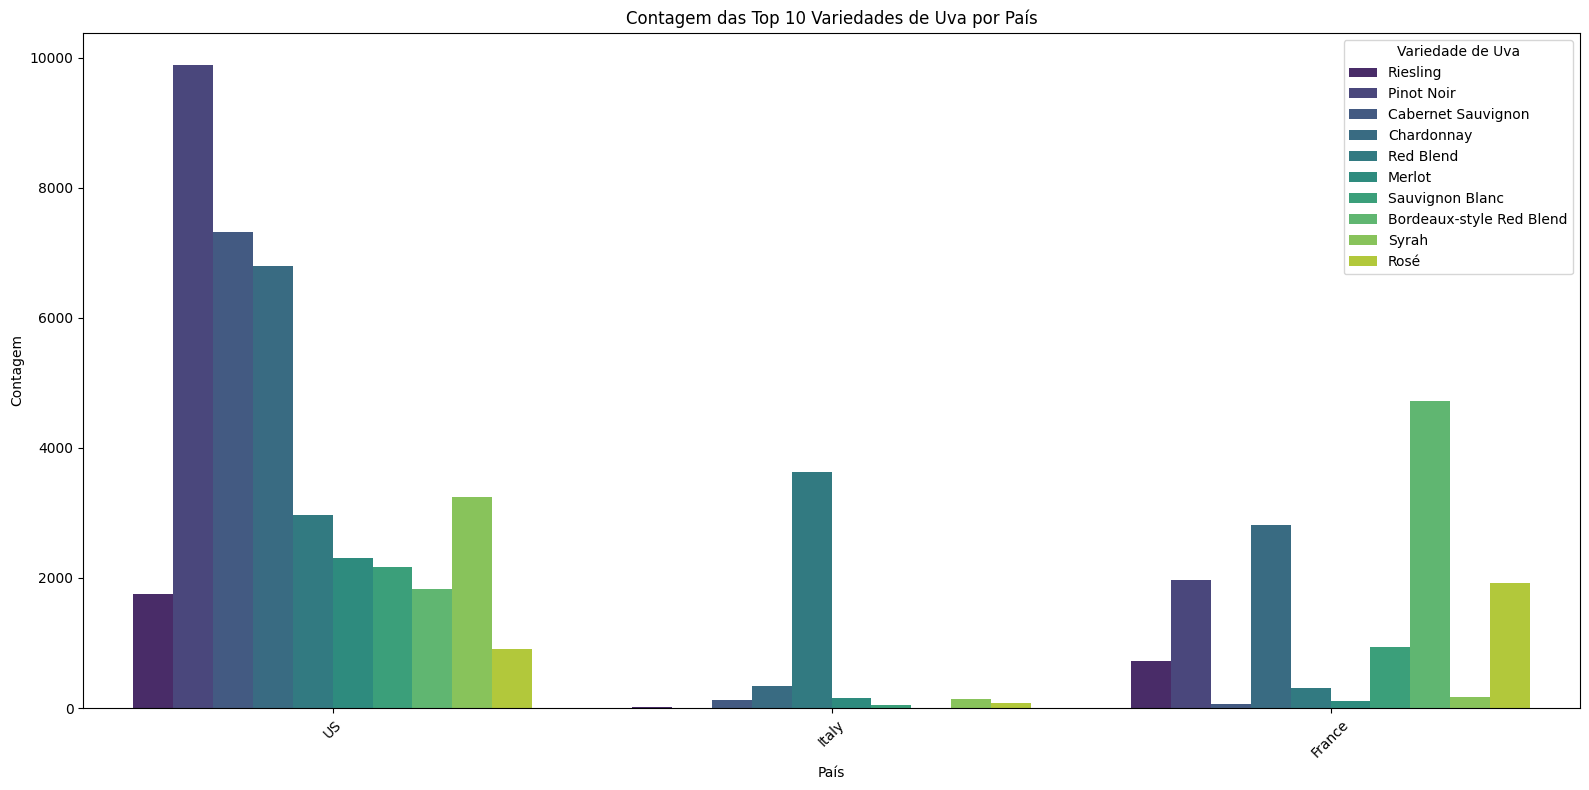

In [73]:
plt.figure(figsize=(16, 8))
sns.countplot(x='country', hue='variety', data=vinhos_top, palette='viridis')
plt.xlabel('País')
plt.ylabel('Contagem')
plt.title('Contagem das Top 10 Variedades de Uva por País')
plt.xticks(rotation=45)
plt.legend(title='Variedade de Uva', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

### Pontuação média por variedade de uva

In [76]:
media_pontos_variedade = vinhos_cleaned[vinhos_cleaned['variety'].isin(top_variedades)]['points'].groupby(vinhos_cleaned['variety']).mean().sort_values(ascending=False)

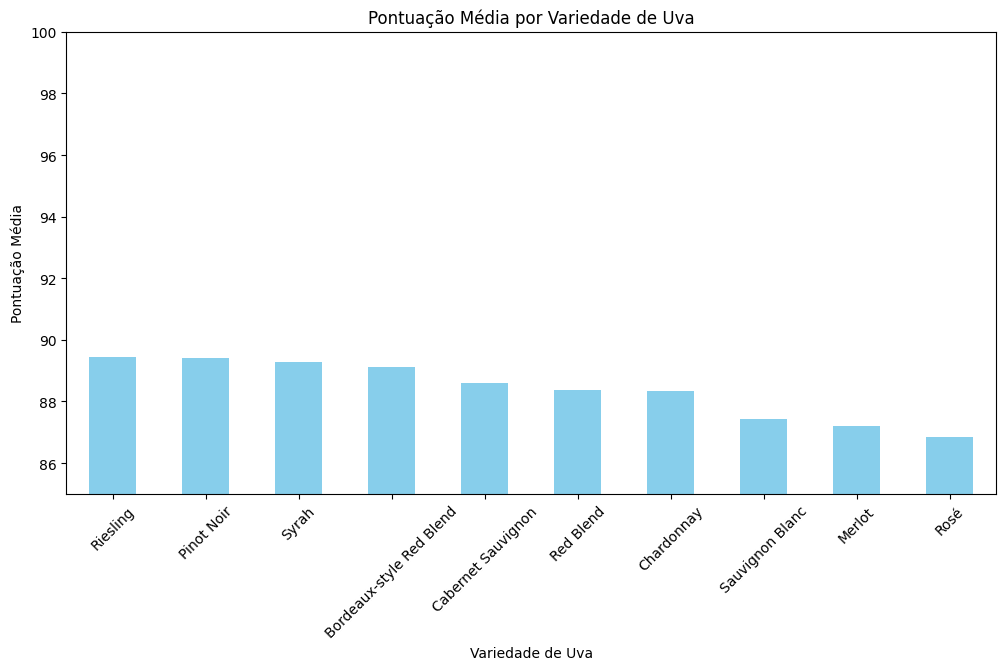

In [79]:
plt.figure(figsize=(12, 6))
media_pontos_variedade.plot(kind='bar', color='skyblue')
plt.xlabel('Variedade de Uva')
plt.ylabel('Pontuação Média')
plt.title('Pontuação Média por Variedade de Uva')
plt.xticks(rotation=45)
plt.ylim(85, 100)
plt.show()

### Pontuação média por títulos de vinho

In [87]:
top_titulos = vinhos_cleaned['title'].value_counts().head(6).index

In [88]:
media_pontos_titulo = vinhos_cleaned[vinhos_cleaned['title'].isin(top_titulos)]['points'].groupby(vinhos_cleaned['title']).mean().sort_values(ascending=False)

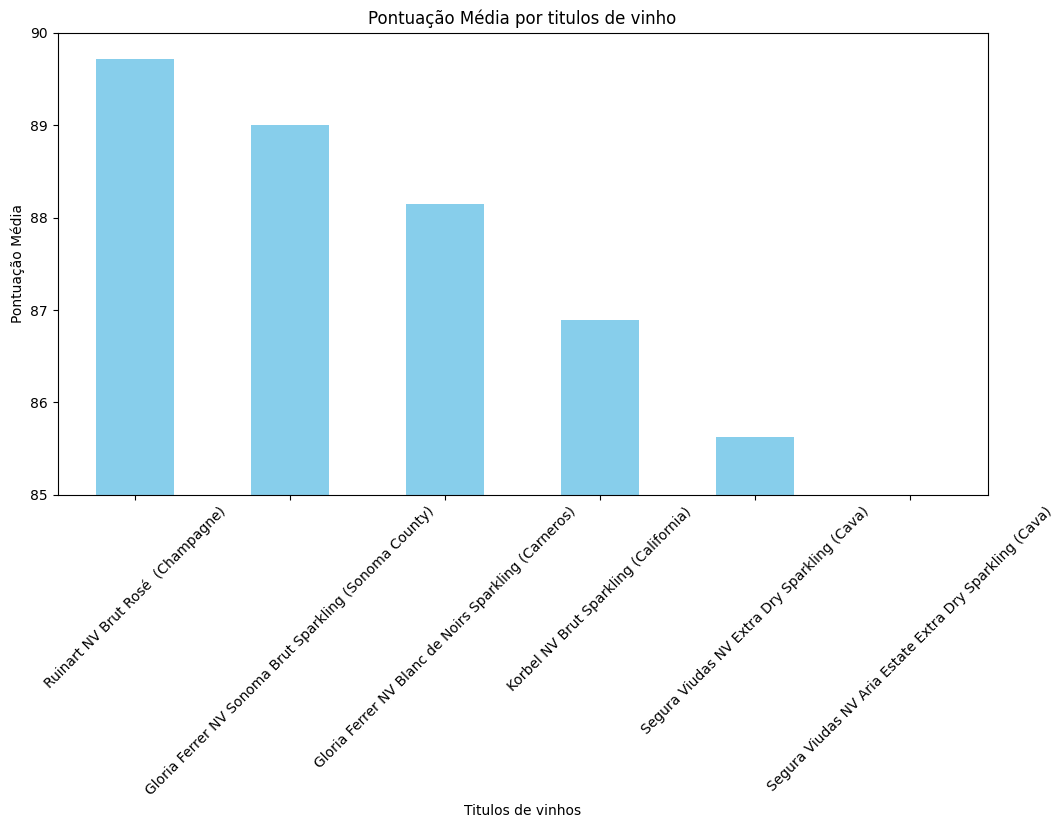

In [89]:
plt.figure(figsize=(12, 6))
media_pontos_titulo.plot(kind='bar', color='skyblue')
plt.xlabel('Titulos de vinhos')
plt.ylabel('Pontuação Média')
plt.title('Pontuação Média por titulos de vinho')
plt.xticks(rotation=45)
plt.ylim(85, 90)
plt.show()